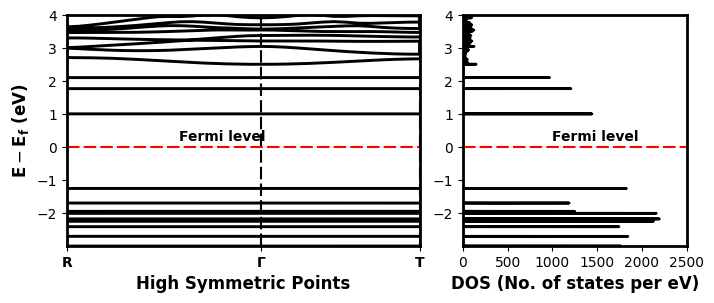

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define Fermi level as a parameter
E_f = -2.5068  # You can change this value based on your data

# Load data for bands and DOS
bands_data = np.loadtxt("bands.xmgr")
dos_data = np.loadtxt("dos.dat")

# Extract data for bands and DOS
bands_x = bands_data[:, 0]
bands_y = bands_data[:, 1] - E_f  # Adjusted for Fermi level

dos_x = dos_data[:, 1]
dos_y = dos_data[:, 0] - E_f  # Adjusted for Fermi level

# Initialize figure with specified size
fig, axes = plt.subplots(1, 2, figsize=(8, 3), gridspec_kw={'width_ratios': [0.63, 0.4]})

# Plot 1: Band Structure
ax1 = axes[0]
ax1.plot(bands_x, bands_y, color="black", linewidth=2.111)
ax1.axhline(0, color='red', linewidth=1.5, linestyle='--', dashes=(6, 2))  # Dashed line for Fermi level

# Add high symmetric points with refined dashed lines
ax1.axvline(1.5, color='black', linestyle='--', linewidth=1.5, dashes=(6, 2))  # Dashed line for R
ax1.axvline(2.366, color='black', linestyle='--', linewidth=1.5, dashes=(6, 2))  # Dashed line for Gamma dash
ax1.axvline(3.0731, color='black', linestyle='--', linewidth=1.5, dashes=(6, 2))  # Dashed line for T

# Set axis labels and ticks
ax1.set_xticks([1.5, 2.366, 3.0731])
ax1.set_xticklabels(['R', '\u0393', 'T'], fontweight='bold', fontsize=10)
ax1.set_xlim(1.5, 3.0731)
ax1.set_ylim(-2.999, 4.012)
ax1.set_xlabel("High Symmetric Points", fontsize=12, fontweight='bold')
ax1.set_ylabel(r"$\mathbf{E} - \mathbf{E_{f}}$ (eV)", fontsize=12, fontweight='bold')  # Bold E-E_f
ax1.text(2, 0.2, 'Fermi level', fontsize=10, fontweight='bold')

# Make the borders of ax1 bold
for spine in ax1.spines.values():
    spine.set_linewidth(2)

# Plot 2: Density of States (DOS)
ax2 = axes[1]
ax2.plot(dos_x, dos_y, color="black", linewidth=2)
ax2.axhline(0, color='red', linewidth=1.5, linestyle='--', dashes=(6, 2))  # Dashed line for Fermi level

# Set axis labels and ticks
ax2.set_xlim(0, 2500)
ax2.set_ylim(-2.999, 4.012)
ax2.set_xlabel("DOS (No. of states per eV)", fontsize=12, fontweight='bold')
ax2.text(1000, 0.2, 'Fermi level', fontsize=10, fontweight='bold')

# Make the borders of ax2 bold
for spine in ax2.spines.values():
    spine.set_linewidth(2)

# Adjust layout and spacing (reduce wspace to decrease gap)
fig.subplots_adjust(wspace=0.15)  # Decreased gap between the figures

# Save the figure to a PDF file with higher quality settings
plt.savefig("01_band_dos.pdf", format="pdf", dpi=600, bbox_inches="tight")

# Show the plot
plt.show()


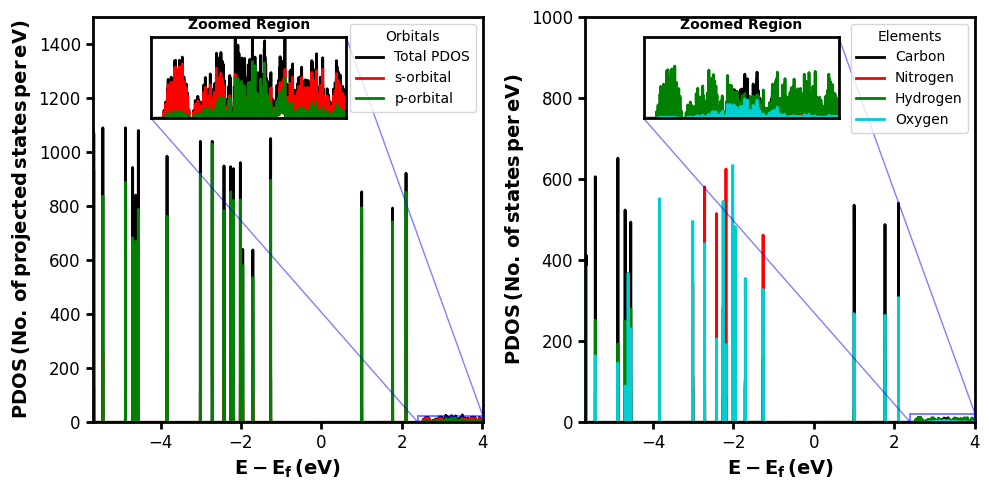

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Define Fermi energy (E_f) in eV
E_f = -2.5068  # eV

# Load data from files
tot_data = np.loadtxt('tot.dat')  # Total PDOS data
s_data = np.loadtxt('s.dat')      # s-orbital PDOS data
p_data = np.loadtxt('p.dat')      # p-orbital PDOS data
c_data = np.loadtxt('c.dat')      # Carbon PDOS data
n_data = np.loadtxt('n.dat')      # Nitrogen PDOS data
h_data = np.loadtxt('h.dat')      # Hydrogen PDOS data
o_data = np.loadtxt('o.dat')      # Oxygen PDOS data

# Shift data for plotting relative to Fermi energy (E_f)
shifted_tot = tot_data[:, 0] - E_f, tot_data[:, 1]
shifted_s = s_data[:, 0] - E_f, s_data[:, 1]
shifted_p = p_data[:, 0] - E_f, p_data[:, 1]
shifted_c = c_data[:, 0] - E_f, c_data[:, 1]
shifted_n = n_data[:, 0] - E_f, n_data[:, 1]
shifted_h = h_data[:, 0] - E_f, h_data[:, 1]
shifted_o = o_data[:, 0] - E_f, o_data[:, 1]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# First plot (Total, s-orbital, and p-orbital PDOS)
ax1 = axes[0]
ax1.plot(shifted_tot[0], shifted_tot[1], label='Total PDOS', color='black', linewidth=2)  
ax1.plot(shifted_s[0], shifted_s[1], label='s-orbital', color='red', linewidth=2)
ax1.plot(shifted_p[0], shifted_p[1], label='p-orbital', color='green', linewidth=2)

# Set labels, limits, and ticks for the first plot
ax1.set_xlabel(r'$\mathbf{E-E_f \, (eV)}$', fontsize=14, fontweight='bold')
ax1.set_ylabel(r'$\mathbf{PDOS \, (No. \, of \, projected \, states \, per \, eV)}$', fontsize=14, fontweight='bold')
ax1.set_xlim([-5.688, 4.012])
ax1.set_ylim([0, 1500])
ax1.tick_params(axis='both', labelsize=12, width=2, length=5)
ax1.spines['top'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)

# Add a zoomed-in inset region on the first plot
zoom_xlim = [2.4, 4.012]
zoom_ylim = [0, 25]
ax1inset = ax1.inset_axes([0.15, 0.75, 0.5, 0.2])
ax1inset.plot(shifted_tot[0], shifted_tot[1], color='black', linewidth=2)
ax1inset.plot(shifted_s[0], shifted_s[1], color='red', linewidth=2)
ax1inset.plot(shifted_p[0], shifted_p[1], color='green', linewidth=2)
ax1inset.set_xlim(zoom_xlim)
ax1inset.set_ylim(zoom_ylim)
ax1inset.set_title('Zoomed Region', fontsize=10, fontweight='bold')
ax1inset.set_xticks([])
ax1inset.set_yticks([])
ax1inset.spines['top'].set_linewidth(2)
ax1inset.spines['right'].set_linewidth(2)
ax1inset.spines['left'].set_linewidth(2)
ax1inset.spines['bottom'].set_linewidth(2)

# Highlight the zoomed area on the main plot with a rectangle
ax1.indicate_inset_zoom(ax1inset, edgecolor='blue', linewidth=1.5)

# Add legend to the first plot
ax1.legend(loc='upper right', fontsize=10, title='Orbitals')

# Second plot (Carbon, Nitrogen, Hydrogen, Oxygen PDOS)
ax2 = axes[1]
ax2.plot(shifted_c[0], shifted_c[1], label='Carbon', color='black', linewidth=2)
ax2.plot(shifted_n[0], shifted_n[1], label='Nitrogen', color='red', linewidth=2)
ax2.plot(shifted_h[0], shifted_h[1], label='Hydrogen', color='green', linewidth=2)
ax2.plot(shifted_o[0], shifted_o[1], label='Oxygen', color='darkturquoise', linewidth=2)

# Set labels, limits, and ticks for the second plot
ax2.set_xlabel(r'$\mathbf{E-E_f \, (eV)}$', fontsize=14, fontweight='bold')
ax2.set_ylabel(r'$\mathbf{PDOS \, (No. \, of \, states \, per \, eV)}$', fontsize=14, fontweight='bold')
ax2.set_xlim([-5.688, 4.012])
ax2.set_ylim([0, 1000])
ax2.tick_params(axis='both', labelsize=12, width=2, length=5)
ax2.spines['top'].set_linewidth(2)
ax2.spines['right'].set_linewidth(2)
ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_linewidth(2)

# Add a zoomed-in inset region on the second plot
zoom_ylim_2 = [0, 20]
ax2inset = ax2.inset_axes([0.15, 0.75, 0.5, 0.2])
ax2inset.plot(shifted_c[0], shifted_c[1], color='black', linewidth=2)
ax2inset.plot(shifted_n[0], shifted_n[1], color='red', linewidth=2)
ax2inset.plot(shifted_h[0], shifted_h[1], color='green', linewidth=2)
ax2inset.plot(shifted_o[0], shifted_o[1], color='darkturquoise', linewidth=2)
ax2inset.set_xlim(zoom_xlim)
ax2inset.set_ylim(zoom_ylim_2)
ax2inset.set_title('Zoomed Region', fontsize=10, fontweight='bold')
ax2inset.set_xticks([])
ax2inset.set_yticks([])
ax2inset.spines['top'].set_linewidth(2)
ax2inset.spines['right'].set_linewidth(2)
ax2inset.spines['left'].set_linewidth(2)
ax2inset.spines['bottom'].set_linewidth(2)

# Highlight the zoomed area on the main plot with a rectangle
ax2.indicate_inset_zoom(ax2inset, edgecolor='blue', linewidth=1.5)

# Add legend to the second plot
ax2.legend(loc='upper right', fontsize=10, title='Elements')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the plot to a PDF file with high resolution (300 dpi)
plt.savefig('01_pdos_atoms_elements.pdf', format='pdf', dpi=300)

# Show the plot on the screen
plt.show()
